<a href="https://colab.research.google.com/github/adnanfathoni88/Big-Data/blob/main/StudentsPerformanceFactors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Adnan Fathoni <br>
NIM : 24.21.1591 <br>
Kelas : IF08 <br>

LINK : https://colab.research.google.com/drive/16YtRffeQxRIw6pRPUDdZbIXL8QRkKstQ?usp=sharing


In [4]:
!pip install pyspark

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when, min, max, sum

# Initialize a Spark session
spark = SparkSession.builder.appName("Student_Performce").getOrCreate()

# Load the CSV file
file_path = "/content/StudentPerformanceFactors.csv"
data_df = spark.read.csv(file_path, header=True, inferSchema=True)

# Tampilkan 5 data dari dataset


In [31]:
# show 5 data
data_df.show(5)

+-------------+----------+--------------------+-------------------+--------------------------+-----------+---------------+----------------+---------------+-----------------+-------------+---------------+-----------+--------------+-----------------+---------------------+------------------------+------------------+------+----------+----------------+
|Hours_Studied|Attendance|Parental_Involvement|Access_to_Resources|Extracurricular_Activities|Sleep_Hours|Previous_Scores|Motivation_Level|Internet_Access|Tutoring_Sessions|Family_Income|Teacher_Quality|School_Type|Peer_Influence|Physical_Activity|Learning_Disabilities|Parental_Education_Level|Distance_from_Home|Gender|Exam_Score|Exam_Score_Label|
+-------------+----------+--------------------+-------------------+--------------------------+-----------+---------------+----------------+---------------+-----------------+-------------+---------------+-----------+--------------+-----------------+---------------------+------------------------+-----

# Hitung jumlah data yang kosong (Null) pada tiap kolomnya

In [3]:
# Hitung jumlah data yang kosong (Null) pada tiap kolomnya
# Mendefinisikan perhitungan null per kolom
null_counts = [count(when(col(c).isNull(), c)).alias(c) for c in data_df.columns]

# Menampilkan hasil perhitungan
data_df.select(null_counts).show()


+-------------+----------+--------------------+-------------------+--------------------------+-----------+---------------+----------------+---------------+-----------------+-------------+---------------+-----------+--------------+-----------------+---------------------+------------------------+------------------+------+----------+
|Hours_Studied|Attendance|Parental_Involvement|Access_to_Resources|Extracurricular_Activities|Sleep_Hours|Previous_Scores|Motivation_Level|Internet_Access|Tutoring_Sessions|Family_Income|Teacher_Quality|School_Type|Peer_Influence|Physical_Activity|Learning_Disabilities|Parental_Education_Level|Distance_from_Home|Gender|Exam_Score|
+-------------+----------+--------------------+-------------------+--------------------------+-----------+---------------+----------------+---------------+-----------------+-------------+---------------+-----------+--------------+-----------------+---------------------+------------------------+------------------+------+----------+
|

# Lakukan agregasi pada data untuk mencari nilai minimum dan maksimum pada kolom Hours_Studied, Attendance, dan Sleep_Hours

In [7]:
agg_df = data_df.agg(min(col('Hours_Studied')).alias('Hours_Studied_min'),
                     min(col('Attendance')).alias('Attendance_min'),
                     min(col('Sleep_Hours')).alias('Sleep_Hours_min'),
                     max(col('Hours_Studied')).alias('Hours_Studied_max'),
                     max(col('Attendance')).alias('Attendance_max'),
                     max(col('Sleep_Hours')).alias('Sleep_Hours_max'))
agg_df.show()

+-----------------+--------------+---------------+-----------------+--------------+---------------+
|Hours_Studied_min|Attendance_min|Sleep_Hours_min|Hours_Studied_max|Attendance_max|Sleep_Hours_max|
+-----------------+--------------+---------------+-----------------+--------------+---------------+
|                1|            60|              4|               44|           100|             10|
+-----------------+--------------+---------------+-----------------+--------------+---------------+



# Gunakan query groupBy untuk menghitung banyaknya data yang berkategori "High", "Low", "Medium" pada kolom Parental_Involvement

In [20]:
# Parental_Involvement
parental_involvement = data_df.groupBy("Parental_Involvement").agg(count("*").alias("Count"))
parental_involvement.show()

+--------------------+-----+
|Parental_Involvement|Count|
+--------------------+-----+
|                High| 1908|
|                 Low| 1337|
|              Medium| 3362|
+--------------------+-----+



# Gunakan query groupBy untuk menghitung banyaknya data yang berkategori "High", "Low", "Medium" pada kolom Parental_Education_Level

In [22]:
# Parental_Education_Level
parental_education_level = data_df.groupBy("Parental_Education_Level").agg(count("*").alias("Count"))
parental_education_level.show()

+------------------------+-----+
|Parental_Education_Level|Count|
+------------------------+-----+
|             High School| 3223|
|                    NULL|   90|
|            Postgraduate| 1305|
|                 College| 1989|
+------------------------+-----+



# Buat kolom baru untuk melabelkan data berdasarkan Exam_Score dengan kondisi berikut: <br>

1. Jika lebih dari sama dengan 81 berikan label "high"
2. Jika kurang dari 81 dan lebih dari sama dengan 61 berikan label "mid"
3. Jika kurang dari 61 berikan label "bad"

In [30]:
data_df = data_df.withColumn("Exam_Score_Label", when(col("Exam_Score") >= 81, "high")
                                     .when((col("Exam_Score") < 81) & (col("Exam_Score") >= 61), "mid")
                                     .otherwise("bad"))
data_df.show(5)

+-------------+----------+--------------------+-------------------+--------------------------+-----------+---------------+----------------+---------------+-----------------+-------------+---------------+-----------+--------------+-----------------+---------------------+------------------------+------------------+------+----------+----------------+
|Hours_Studied|Attendance|Parental_Involvement|Access_to_Resources|Extracurricular_Activities|Sleep_Hours|Previous_Scores|Motivation_Level|Internet_Access|Tutoring_Sessions|Family_Income|Teacher_Quality|School_Type|Peer_Influence|Physical_Activity|Learning_Disabilities|Parental_Education_Level|Distance_from_Home|Gender|Exam_Score|Exam_Score_Label|
+-------------+----------+--------------------+-------------------+--------------------------+-----------+---------------+----------------+---------------+-----------------+-------------+---------------+-----------+--------------+-----------------+---------------------+------------------------+-----

# Hitung banyaknya data berdasarkan kategori kolom Parental_Involvement dan lakukan pivot untuk menghitung banyaknya data dari tiap label bad, high, dan mid

In [32]:
df = data_df.groupBy("Parental_Involvement").pivot("Exam_Score_Label").count()
df.show()

+--------------------+---+----+----+
|Parental_Involvement|bad|high| mid|
+--------------------+---+----+----+
|                High| 17|  15|1876|
|                 Low| 55|  12|1270|
|              Medium| 73|  16|3273|
+--------------------+---+----+----+



# Hitung banyaknya data berdasarkan kolom Sleep_Hours dan lakukan pivot untuk menghitung banyaknya data dari tiap label bad, high, dan mid

In [33]:
df = data_df.groupBy("Sleep_Hours").pivot("Exam_Score_Label").count()
df.show()

+-----------+---+----+----+
|Sleep_Hours|bad|high| mid|
+-----------+---+----+----+
|          6| 26|   9|1341|
|          5| 15|   3| 677|
|          9| 23|   7| 745|
|          4|  8|   4| 297|
|          8| 23|   7|1369|
|          7| 43|  12|1686|
|         10|  7|   1| 304|
+-----------+---+----+----+



# Hitung banyaknya data berdasarkan kolom Hours_Studied dan lakukan pivot untuk menghitung banyaknya data dari tiap label bad, high, dan mid

In [34]:
df = data_df.groupBy("Hours_Studied").pivot("Exam_Score_Label").count()
df.show()

+-------------+----+----+---+
|Hours_Studied| bad|high|mid|
+-------------+----+----+---+
|           31|NULL|   1| 76|
|           34|NULL|NULL| 29|
|           28|NULL|   2|169|
|           26|NULL|   1|262|
|           27|NULL|   2|227|
|           44|NULL|NULL|  1|
|           12|  13|NULL|179|
|           22|   1|   2|399|
|            1|   1|   1|  1|
|           13|  18|NULL|200|
|            6|   3|NULL| 14|
|           16|  10|   3|338|
|            3|   5|NULL|  7|
|           20|   3|NULL|462|
|            5|   5|NULL| 16|
|           19|   3|   2|436|
|           43|NULL|NULL|  1|
|           15|   9|   1|305|
|           37|NULL|NULL|  6|
|           17|   4|   1|376|
+-------------+----+----+---+
only showing top 20 rows



# Lakukan sorting terhadap data olahan cell sebelumnya dengan parameter ascending = False

In [44]:
df = data_df.groupBy("Hours_Studied").pivot("Exam_Score_Label").count().orderBy(col("Hours_Studied").desc())
df.show()

+-------------+----+----+---+
|Hours_Studied| bad|high|mid|
+-------------+----+----+---+
|           44|NULL|NULL|  1|
|           43|NULL|NULL|  1|
|           39|NULL|NULL|  7|
|           38|NULL|NULL|  7|
|           37|NULL|NULL|  6|
|           36|NULL|NULL| 11|
|           35|NULL|NULL| 20|
|           34|NULL|NULL| 29|
|           33|NULL|NULL| 40|
|           32|NULL|NULL| 54|
|           31|NULL|   1| 76|
|           30|NULL|   1|122|
|           29|NULL|   1|133|
|           28|NULL|   2|169|
|           27|NULL|   2|227|
|           26|NULL|   1|262|
|           25|NULL|   4|285|
|           24|   1|   3|353|
|           23|NULL|   1|410|
|           22|   1|   2|399|
+-------------+----+----+---+
only showing top 20 rows



# Bonus soal

Tampilkan graphic data dari hasil sorting cell sebelumnya

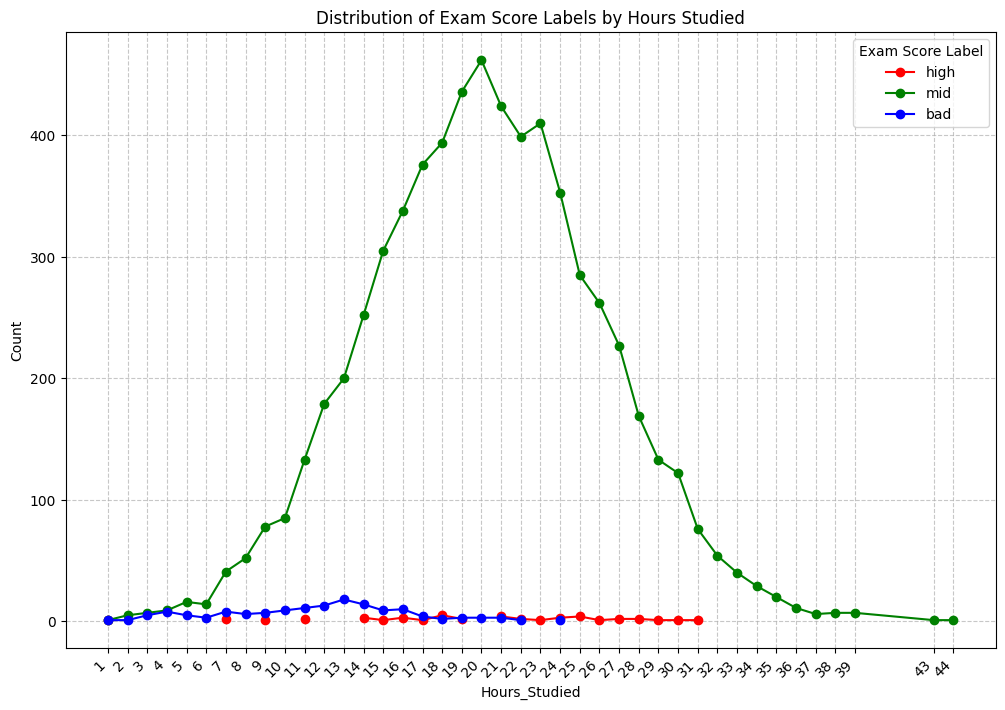

In [65]:
import matplotlib.pyplot as plt

# Konversi DataFrame Spark ke Pandas DataFrame
df_pandas = df.toPandas()

# Atur indeks dari kolom 'Hours_Studied' agar lebih mudah untuk plotting
df_pandas.set_index("Hours_Studied", inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(df_pandas.index, df_pandas["high"], "ro-", label="high")
ax.plot(df_pandas.index, df_pandas["mid"], "go-", label="mid")
ax.plot(df_pandas.index, df_pandas["bad"], "bo-", label="bad")

# Set label
plt.title("Distribution of Exam Score Labels by Hours Studied")
plt.xlabel("Hours_Studied")
plt.ylabel("Count")

# Set x-axiss
plt.xticks(df_pandas.index, rotation=45, ha='right')

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.legend(title="Exam Score Label")
plt.show()